    Velocity   ,  theta   ,     Max R ,      Max H
[[4.94601646e+01 2.05274794e+01 1.63948222e+02 1.53468417e+01]
 [2.55473924e+01 3.56696919e+01 6.30978284e+01 1.13224492e+01]
 [3.77315098e+01 8.96916807e+01 1.56344267e+00 7.26339594e+01]
 ...
 [1.80087061e+01 4.93895554e+00 5.67711782e+00 1.22647291e-01]
 [9.86607152e+01 7.82692502e+01 3.95448880e+02 4.76100703e+02]
 [1.09026689e+01 1.99828951e+00 8.45382204e-01 7.37403213e-03]]


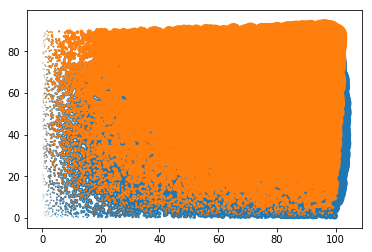

Training ------------
Epoch 1/40
8000/8000 [==============================] - 2s 279us/step - loss: 61034.3716 - acc: 0.1784
Epoch 2/40
8000/8000 [==============================] - 1s 63us/step - loss: 57490.0406 - acc: 0.2670
Epoch 3/40
8000/8000 [==============================] - 0s 61us/step - loss: 56861.4190 - acc: 0.2954: 0s - loss: 57143.6449 - acc: 0.2
Epoch 4/40
8000/8000 [==============================] - 0s 61us/step - loss: 56757.5366 - acc: 0.2895
Epoch 5/40
8000/8000 [==============================] - 0s 62us/step - loss: 56607.9300 - acc: 0.2933
Epoch 6/40
8000/8000 [==============================] - 0s 60us/step - loss: 56748.4556 - acc: 0.2940
Epoch 7/40
8000/8000 [==============================] - 1s 95us/step - loss: 56850.9968 - acc: 0.2941
Epoch 8/40
8000/8000 [==============================] - 1s 76us/step - loss: 56675.0514 - acc: 0.2944
Epoch 9/40
8000/8000 [==============================] - 0s 61us/step - loss: 56674.9534 - acc: 0.2928
Epoch 10/40
8000/8000 [==

In [21]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

#dataset
dataset = 10000

np.random.seed(50)

#產生dataset列 X2行的0~1隨機數字
D=np.random.random(size=(dataset,2))
#velocity 假設初速
V=D[:,0]*100
#theta 假設角度
theta=D[:,1]*90


#初速平方
v2=pow(V,2)

#sin theta 平方
sin2=pow(np.sin(np.deg2rad(theta)),2)

#sin theta乘 cos theta
sincos=np.multiply(np.sin(np.deg2rad(theta)),np.cos(np.deg2rad(theta)))


#拋物線公式計算Max H & R
H=np.multiply(v2,sin2)/2/9.8
R=2*np.multiply(v2,sincos)/9.8

#將數據重新reshaape
V=np.reshape(V,(dataset,-1))
theta=np.reshape(theta,(dataset,-1))
H=np.reshape(H,(dataset,-1))
R=np.reshape(R,(dataset,-1))






#將數據append一起
dataset2=np.append(V,theta, axis=1)
dataset2=np.append(dataset2,R, axis=1)
dataset2=np.append(dataset2,H, axis=1)
print("    Velocity   ,  theta   ,     Max R ,      Max H")
print(dataset2)


plt.scatter(V,theta,R)
plt.scatter(V,theta,H)
plt.show()

#X為已知初速及仰角 Y為結果之Max R&H
X=dataset2[:,:2]
Y=dataset2[:,2:4]

# 建立 trainig 與 testing data
X_train, Y_train = X[:8000], Y[:8000] # 取資料點當中前 80% 筆資料當作 training data
X_test, Y_test = X[2000:], Y[2000:] # 取資料點當中，後 20% 筆資料當作 testing data




model = keras.models.Sequential()

# 定義一個輸入變數，設定一個輸入層及兩個隱藏層
model.add(keras.layers.Dense(2, input_dim=2,kernel_initializer='normal', activation='relu'))    
model.add(keras.layers.Dense(8, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(keras.layers.Dense(2, activation=tf.nn.relu))

# https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#compile
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])


print( "Training ------------")
# Another way to train the model
model.fit(X_train, Y_train, epochs=40, batch_size=32)
# nb_epoch 控制我們要訓練幾次

print( "\nTesting ------------")
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, Y_test)

print( "test loss: {}".format(loss))
print( "test accuracy: {}".format(accuracy))
